# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

# Find the header elements in the table
header = table.find_all('th')

# Create an empty list for the column names (header elements)
columns = []

# Loop through all the elements of the header
for i in range(len(header)):
    # Add the elements to the header string, with a comma
    columns.append(header[i].text)
# Print all the header elements, including the last one
print(f"Columns: {columns}")

Columns: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Find all the rows (class data-row to ignore header)
data_rows = table.find_all('tr', class_ = 'data-row')

# Create an empty list
data_dicts = []

# Loop through all the rwos
for row in data_rows:
    # Find all row elementt
    data = row.find_all('td')

    # Create an empty dictionary for the row elements
    data_row = {}

    # Loop through all the columns
    for i in range(len(columns)):
        # Add the row element to the dictionary, indexed by column name
        data_row[columns[i]] = data[i].text

    data_dicts.append(data_row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(data_dicts)
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# With all the data saved in the DataFrame, the browser cab be closed
browser.quit()

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [22]:
# Change data types for data analysis
# Numerical types
clean_weather_df = weather_df.astype({'sol': 'int',
                                    'ls': 'int',
                                    'month': 'int',
                                    'min_temp': 'float',
                                    'pressure': 'float'})

# Datetime types
clean_weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'], format='%Y-%m-%d')

In [23]:
# Confirm type changes were successful by examining data types again
clean_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 4.1: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
csvfile = Path('Cleaned_Data/clean_weather_data.csv')
clean_weather_df.to_csv(csvfile, index=False)

### Step 4.2: Import Cleaned Data from CSV
Instead of completing the scraping and cleaning process again, the data can be loaded directly from the CSV file. If the file does not exist, or the DataFrame cannot be loaded, an error message will be displayed and it will be necessary to rerun all the steps above.

Even if the file do exist, please make sure to run the first cell in this notebook to import the necessary dependencies before running the code below.

In [50]:
try:
    csvfile = Path('Cleaned_Data/clean_weather_data.csv')
    weather_df = pd.read_csv(csvfile)
    print('DataFrame succesfully loaded. Please proceed.')

    # Change data types for data analysis
    # Numerical types
    clean_weather_df = weather_df.astype({'sol': 'int',
                                    'ls': 'int',
                                    'month': 'int',
                                    'min_temp': 'float',
                                    'pressure': 'float'})

    # Datetime types
    clean_weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'], format='%Y-%m-%d')

    display(clean_weather_df)
except Exception as inst:
    print(f"Error: {inst}")
    print('Pleae restart the kernel and run all cells in this notebook.')

DataFrame succesfully loaded. Please proceed.


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [51]:
# 1. How many months are there on Mars?
num_of_months = clean_weather_df['month'].nunique()

print(f"There are {num_of_months} months on Mars.")

clean_weather_df['month'].value_counts().sort_index()

There are 12 months on Mars.


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [52]:
# 2. How many Martian days' worth of data are there?
num_of_sols = clean_weather_df['sol'].count()
print(f"There are {num_of_sols} Martian days (sols) worth of data")

There are 1867 Martian days (sols) worth of data


In [53]:
# 3. What is the average low temperature by month?
avg_temp_per_month = clean_weather_df.groupby(['month']).mean('min_temp')['min_temp']
avg_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

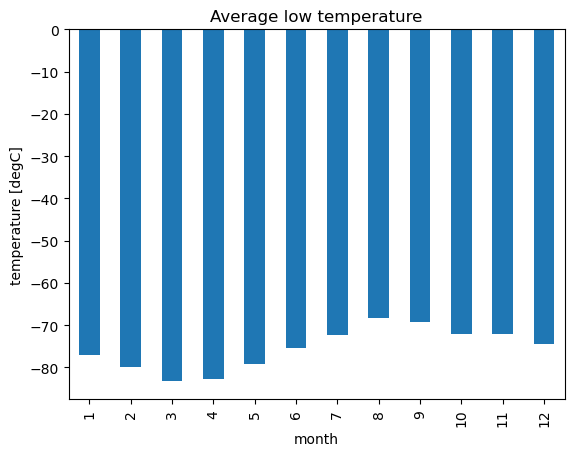

In [54]:
# Plot the average temperature by month
avg_temp_per_month.plot.bar('min_temp', title = 'Average low temperature', ylabel = 'temperature [degC]')

# Save image as PNG
plt.savefig('Output/avg_temp_per_month.png')

# Show plot
plt.show()

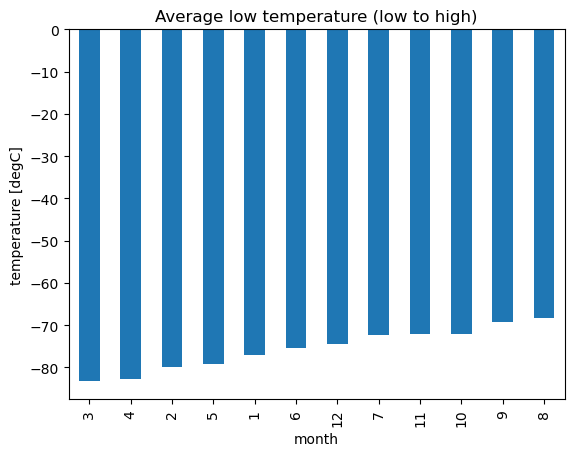

In [55]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp_per_month_sorted = avg_temp_per_month.sort_values()

avg_temp_per_month_sorted.plot.bar('min_temp', title = 'Average low temperature (low to high)', ylabel = 'temperature [degC]')

# Save image as PNG
plt.savefig('Output/avg_temp_per_month_sorted.png')

# Show plot
plt.show()

In [56]:
# 4. Average pressure by Martian month
avg_press_per_month = clean_weather_df.groupby(['month']).mean('pressure')['pressure']
avg_press_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

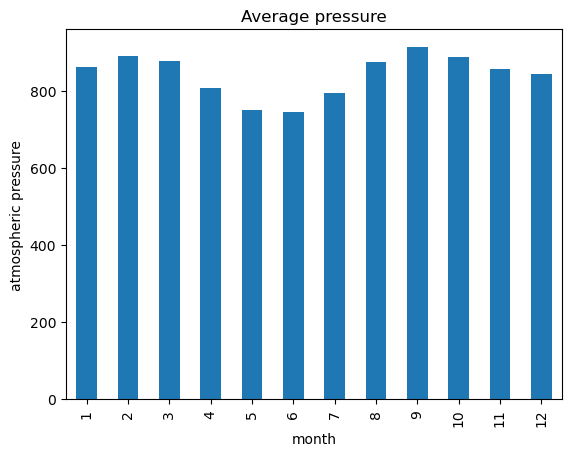

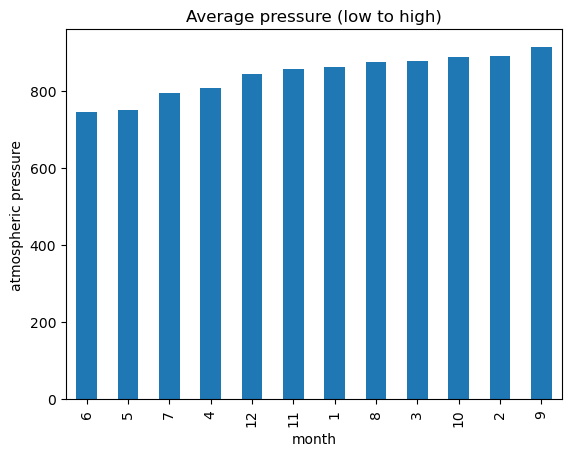

In [57]:
# Plot the average pressure by month
avg_press_per_month.plot.bar('min_temp', title = 'Average pressure', ylabel = 'atmospheric pressure')

# Save image as PNG
plt.savefig('Output/avg_press_per_month.png')

# Show plot
plt.show()

# Identify the lowest and highest pressure
avg_press_per_month_sorted = avg_press_per_month.sort_values()

avg_press_per_month_sorted.plot.bar('min_temp', title = 'Average pressure (low to high)', ylabel = 'atmospheric pressure')

# Save image as PNG
plt.savefig('Output/avg_press_per_month_sorted.png')

# Show plot
plt.show()

Start day: 2012-08-16 00:00:00
Start day: 2018-02-27 00:00:00
Mission duration: 2021 terrestrial days

Number of days between peaks: ~680


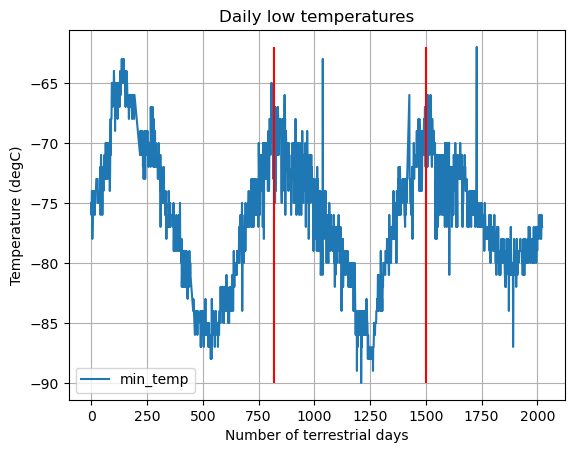

In [117]:
# 5. How many terrestrial (earth) days are there in a Martian year?
daily_temperature = clean_weather_df[['terrestrial_date', 'sol', 'min_temp']]

first_day = daily_temperature['terrestrial_date'].min()
last_day = daily_temperature['terrestrial_date'].max()

print(f"Start day: {first_day}")
print(f"Start day: {last_day}")

delta = last_day - first_day
num_of_days = delta.days

print(f"Mission duration: {num_of_days} terrestrial days")
print()

# Ignore warning caused by creation of new column
pd.set_option('mode.chained_assignment', None)

# Create a new column in the DataFrame
daily_temperature['Number of terrestrial days'] = 0

# Iterate through the types_df DataFrame
for index, row in daily_temperature.iterrows():
    delta = daily_temperature.loc[index,'terrestrial_date'] - first_day
    daily_temperature.loc[index,'Number of terrestrial days'] = delta.days

daily_temperature.plot('Number of terrestrial days', 'min_temp', grid = True, title = 'Daily low temperatures', ylabel = 'Temperature (degC)')

# Manually estimate peak to peak distance (in days)
min_temp = daily_temperature['min_temp'].min()
max_temp = daily_temperature['min_temp'].max()

plt.vlines(820,min_temp, max_temp, 'r')
plt.vlines(1500,min_temp, max_temp, 'r')

peak_to_peak = 1500-820
print(f"Number of days between peaks: ~{peak_to_peak}")

# Save image as PNG
plt.savefig('Output/daily_temperature.png')

# Show plot
plt.show()

In [93]:
# Duration of a martian day
sol_num = daily_temperature['sol'].max() - daily_temperature['sol'].min()
day_num = daily_temperature['Number of terrestrial days'].max() - daily_temperature['Number of terrestrial days'].min()

print(f"A martian day is {int(24*day_num/sol_num)} hours and {round((24*day_num/sol_num % 24)*60,1)} minutes")

A martian day is 24 hours and 39.5 minutes
